In [188]:
#!c1.8
# Визуализация в ноутбуке
%matplotlib inline
from IPython.display import clear_output
import tqdm

# База
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Аугментации
import albumentations as A

# Torch
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp

print('Ready to work')

Ready to work


In [189]:
#!c1.8
from utils import get_paths
from utils import CancerDataset
from utils import ConfigBase

In [190]:
#!c1.8
class ShowConfig(ConfigBase):
    data_folders = 'data/tissue-segment'
    
paths = get_paths(ShowConfig)
print(len(paths))
print(*paths[0], sep='\n')
ds = CancerDataset(paths)

220
data/tissue-segment/18-04842B_2019-05-07 23_40_49-lv1-22633-15157-4325-3516.jpg
data/tissue-segment/18-04842B_2019-05-07 23_40_49-lv1-22633-15157-4325-3516_mask.jpg


In [191]:
#!c1.8
def show_image(image, mask):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.axis('off')
    ax1.imshow(image.squeeze(), cmap='gray')
    ax2.axis('off')
    ax2.imshow(mask.squeeze() * 255, cmap='gray')
    plt.show()

In [ ]:
#!c1.8
IMAGE_NUMBER = 0
print(image.shape)
image, mask = ds[IMAGE_NUMBER]
show_image(image, mask)

In [193]:
#!c1.8
def calc_stats(ds):
    aspect_ratios = []
    patologies = []
    width = []
    height = []
    area = []
    for i in tqdm.tqdm(range(len(ds))):
        image, mask = ds[i]
        aspect_ratios.append(image.shape[1] / image.shape[0])
        width.append(image.shape[1])
        height.append(image.shape[0])
        area.append(image.shape[1] * image.shape[0])
        patologies.append(float(mask.sum() / (mask.shape[1] * mask.shape[0])))
    stats = {
        'aspect_ratios': aspect_ratios,
        'patologies': patologies,
        'height': height,
        'width': width,
        'area': area
    }
    return stats

stats = calc_stats(ds)

100%|██████████| 220/220 [06:58<00:00,  1.90s/it]


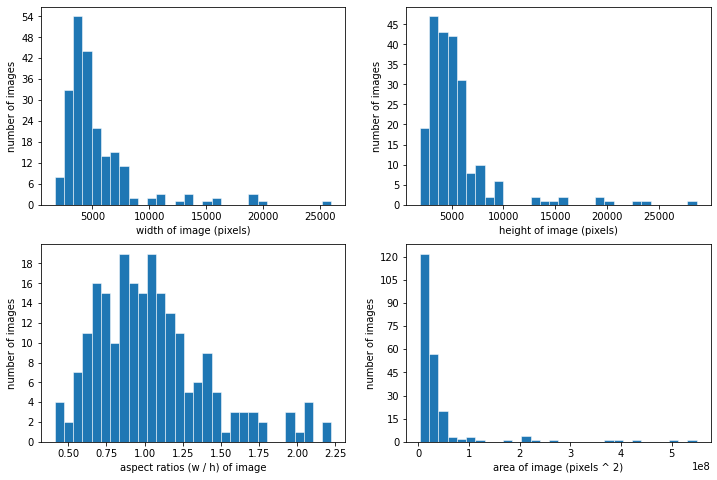

In [194]:
#!c1.8
from matplotlib.ticker import MaxNLocator


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
ax1.hist(stats['width'], bins=30, linewidth=0.5, edgecolor="white")
ax1.set_ylabel('number of images')
ax1.set_xlabel('width of image (pixels)')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

ax2.hist(stats['height'], bins=30, linewidth=0.5, edgecolor="white")
ax2.set_ylabel('number of images')
ax2.set_xlabel('height of image (pixels)')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax3.hist(stats['aspect_ratios'], bins=30, linewidth=0.5, edgecolor="white")
ax3.set_ylabel('number of images')
ax3.set_xlabel('aspect ratios (w / h) of image')
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

ax4.hist(stats['area'], bins=30, linewidth=0.5, edgecolor="white")
ax4.set_ylabel('number of images')
ax4.set_xlabel('area of image (pixels ^ 2)')
ax4.yaxis.set_major_locator(MaxNLocator(integer=True))


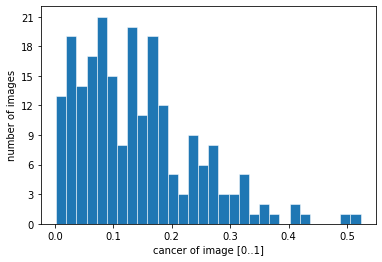

In [195]:
#!c1.8
ax = plt.figure().gca()
ax.hist(stats['patologies'], bins=30, linewidth=0.5, edgecolor="white")
ax.set_ylabel('number of images')
ax.set_xlabel('cancer of image [0..1]')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
#!c1.8
for i in range(len(ds)):
    print(i)
    image, mask = ds[i]
    assert image.shape[:2] == mask.shape[:2], "Shapes not equal"
    print(f'H={image.shape[0]} W={image.shape[1]}')
    show_image(image, mask)

In [197]:
#!c1.8
